In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

Using TensorFlow backend.


In [15]:
df = utils.get_dataset()

In [16]:
df = preprocessing.joris_preprocessing_pipeline(df)

In [17]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Responsiveness,ave_purchase,income_share
0,1957,58138.0,0,0,663,58,635,88,546,172,...,0,0,0,0,1,0,0,0.0,2.438914,0.027813
1,1954,46344.0,1,1,113,38,11,1,6,2,...,0,0,0,0,1,0,0,0.0,0.238938,0.000583
2,1965,71613.0,0,0,312,26,426,49,127,111,...,1,0,0,0,1,0,0,0.0,2.487179,0.010836
3,1984,26646.0,1,0,139,26,11,4,20,10,...,1,0,0,0,1,0,0,0.0,0.381295,0.001989
4,1981,58293.0,1,0,161,94,173,43,118,46,...,0,0,0,0,0,0,1,0.0,2.621118,0.007239


In [7]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Partner',
       'income_housemember', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Responsiveness', 'ave_purchase', 'income_share'],
      dtype='object')

In [18]:
df = preprocessing.Binning_Features(df, "Income", n_bins=5)
df = preprocessing.Binning_Features(df, "MntWines", n_bins=5)
df = preprocessing.Binning_Features(df, "MntFruits", n_bins=5)
df = preprocessing.Binning_Features(df, "MntMeatProducts", n_bins=5)
df = preprocessing.Binning_Features(df, "MntFishProducts", n_bins=5)
df = preprocessing.Binning_Features(df, "MntSweetProducts", n_bins=5)
df = preprocessing.Binning_Features(df, "MntGoldProds", n_bins=5)
df = preprocessing.Binning_Features(df, 'Responsiveness', n_bins=5)
df = preprocessing.Binning_Features(df, 'ave_purchase', n_bins=5)
df = preprocessing.Binning_Features(df, 'income_share', n_bins=5)



/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X,y = utils.X_y_split(df)

In [ ]:
models = {
    "KerasNN_not_fitted" : KerasNN_not_fitted(),
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None),
    "XGBClassifier" : XGBClassifier(colsample_by_tree=0.1,
                                  learning_rate=0.89,
                                  max_depth=8,
                               n_estimators=10000,
                                  eval_metric="auc",                                
                                  n_jobs=-1, silent=0, verbose=0),
    "MLPClassifier" : MLPClassifier(hidden_layer_sizes=(10), solver = "lbfgs", max_iter=1000, random_state=42),
    "LinearRegression" : LinearRegression()
}

In [21]:
models = {"KerasNN_not_fitted" : KerasNN_not_fitted(input_dim=39)}

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype u

{'KerasNN_not_fitted': 0.412}

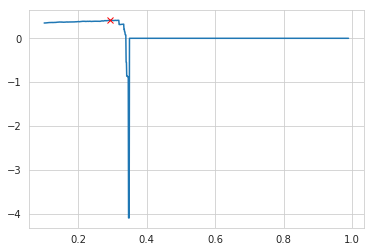

In [22]:
utils.Cross_Val_Models(models, X, y, sampling_technique=None, scaler=scaler)

In [ ]:
df.columns

In [ ]:
features=["MntWines","MntFruits","Income",'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for feature in features:
    Binning_features(df, feature="Income", n_bins=10, cont_tab=False)

In [ ]:
df["Income_bin"] = mnt_bin

In [ ]:
df.head()

In [ ]:
obs_cont_tab

In [ ]:
# 1) obtain the observed contingency table
feature, target = "Education", "Response"
df_rec = df[[feature, target]]

obs_cont_tab = pd.crosstab(df_rec[feature], df_rec[target], margins = True)
obs_cont_tab 

In [ ]:
# 2) calculate the expected contingency table, assuming there is no association
exp_cont_tab = obs_cont_tab.copy()

n_r = exp_cont_tab.iloc[:-1, -1]
N = exp_cont_tab.iloc[-1, -1]
for c in range(obs_cont_tab.shape[1]-1):
    n_c = exp_cont_tab.iloc[-1, c]
    exp_cont_tab.iloc[:-1, c] = np.divide(np.multiply(n_c, n_r), N)

# visually compare both tables, side by side
pd.concat([obs_cont_tab.iloc[:, :-1], exp_cont_tab], axis=1)

In [ ]:
# 3) compute the test statistic as measure of dissimilarity between the expected and observed tables
obs, exp = [], []
for c in range(obs_cont_tab.shape[1]-1):
    exp.append(exp_cont_tab.iloc[:-1, c].values)
    obs.append(obs_cont_tab.iloc[:-1, c].values)
    
chi_squared_stat = np.sum(np.divide(np.power(np.subtract(obs, exp), 2), exp))
print('Chi-squared test statistic: {0:.2f}'.format(chi_squared_stat))

In [ ]:
from scipy import stats
chisq = stats.chi2_contingency(obs_cont_tab.iloc[:-1, [0, 1]].values)[0:2]
print("Test statistic: {0:.2f}, p-value: {1:.4f}".format(chisq[0], chisq[1]))

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 
                 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 
                 0.55, bottom=cont_tab.iloc[:-1, 0], color="red")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
    
    mean_target = 1-df[target].mean()
    
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="red")
    plt.plot([.5, len(categories)+.5], [mean_target, mean_target],'--', lw=2, color="black")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

for i in df:
    bar_charts_categorical(df, i, "Response")

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# 1) equal width binning of a continuous feature
feature, n_bins = "Income", 10
bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
mnt_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
mnt_bin = pd.Series(mnt_bin[:, 0], index=df.index)
print("Parameters of discretizer: ", bindisc.get_params())
print("Thresholds for {} bins of {}: ".format(n_bins, feature), bindisc.bin_edges_)

# 2) generate a contingency table, required for the Chi-Squared test
obs_cont_tab = pd.crosstab(mnt_bin, df[target])

# 3) compute Chi-Squared test for binned feature
chisq=stats.chi2_contingency(obs_cont_tab.values)[0:2]
print("Test statistic: {0:0.2f}, p-value: {1:0.2f}".format(chisq[0], chisq[1]))

In [ ]:
# 1) equal width binning of a continuous feature
feature, n_bins = "Income", 10
bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
mnt_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
mnt_bin = pd.Series(mnt_bin[:, 0], index=df.index)
print("Parameters of discretizer: ", bindisc.get_params())
print("Thresholds for {} bins of {}: ".format(n_bins, feature), bindisc.bin_edges_)

# 2) generate a contingency table, required for the Chi-Squared test
obs_cont_tab = pd.crosstab(mnt_bin, df[target])

# 3) compute Chi-Squared test for binned feature
chisq=stats.chi2_contingency(obs_cont_tab.values)[0:2]
print("Test statistic: {0:0.2f}, p-value: {1:0.2f}".format(chisq[0], chisq[1]))

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def bar_charts_continuous(df, feature, target, n_bins=10, binning_strategy="uniform", chi_sq=False):
    bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
    feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
    
    cont_tab = pd.crosstab(feature_bin, df[target], margins = True)
    categories = cont_tab.index[:-1].astype(str) 
    
    if chi_sq:
        chisq = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 
                 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 
                 0.55, bottom=cont_tab.iloc[:-1, 0], color="red")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
    
    mean_target = 1-df[target].mean()
    
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="red")
    plt.plot([-.5, len(categories)], [mean_target, mean_target],'--', lw=2, color="black")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.show()
    
    if chi_sq:
        return chisq

chi_sq=bar_charts_continuous(df, "Income", "Response", 10, "uniform", True)
print("Test statistic: {0:0.2f}, p-value: {1:0.2f}".format(chi_sq[0], chi_sq[1]))

In [ ]:
feature, target = "Income", "Response"
df_smd = df[[feature, target]]

mean_feature = df_smd[feature].mean()
df_smd[feature+"_SMD"] = (df_smd[feature].sub(mean_feature)).div(mean_feature)

smd_summary = df_smd.groupby([target]).agg({feature+"_SMD": "mean", feature: "mean"})  
display(smd_summary)
print("Average {0}: {1:.2f}, SMD of {2}: {3:.2f}".format(feature, mean_feature, feature, smd_summary[feature+"_SMD"].abs().sum()))

In [ ]:
# plots the bar chart
plt.bar(x = smd_summary.index, height=smd_summary[feature+"_SMD"], color="gray")
plt.title("SMD of " + feature)
plt.xlabel(target)
plt.ylabel("$SMD$")
plt.show()

In [ ]:
# 1) intermediary step: compute SMD0, SMD1 and SMD for every continuous feature
num_list = df.select_dtypes(include=["number"]).drop(["Response"], axis=1).columns
target = "Response"

smd_dict = {"smd0": [], "smd1": [], "smd": []}
for feature in num_list:
    df_smd = df[[feature, target]]
    mean_feature = df_smd[feature].mean()
    df_smd[feature] = (df_smd[feature].sub(mean_feature)).div(mean_feature) 
    smd_summary = df_smd.groupby([target]).agg({feature: "mean"})  
    smd_dict["smd0"].append(smd_summary.iloc[0, 0])
    smd_dict["smd1"].append(smd_summary.iloc[1, 0])
    smd_dict["smd"].append(smd_summary[feature].abs().sum())

smd_dict

In [ ]:
# 2) intermediary step: plot SMD0 (gray), SMD1 (red) ordered by SMD
import operator
import matplotlib
import matplotlib.pyplot as plt

df1 = pd.DataFrame(smd_dict, index=num_list).sort_values("smd", ascending=False)
colors, groups = ("gray", "red"), ("non-respondents", "respondents")
g0, g1 = (df1.index, df1.iloc[:, 0]), (df1.index, df1.iloc[:, 1])
data = (g0, g1)

fig = plt.figure(figsize=(len(df1.index)+1, 4))
ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")
for data, color, group in zip(data, colors, groups):    
    X, y = data
    ax.scatter(x=X, y=y.values, s=80, marker="s", label=group, c=color)

ax.set_title("Scaled Mean Deviation (SMD)")
ax.set_xlabel("Continuous features")
ax.set_ylabel("SMD")
ax.legend()
plt.xticks(fontsize=9, rotation=60)  

plt.show()

In [ ]:
def smd01_plot(df, nfeature_list, target, return_df_smd=True):  
    smd_dict = {"smd0": [], "smd1": [], "smd": []}
    for feature in num_list:
        df_smd = df[[feature, target]]
        mean_feature = df_smd[feature].mean()
        df_smd[feature] = (df_smd[feature].sub(mean_feature)).div(mean_feature) 
        df_smd = df_smd.groupby([target]).agg({feature: "mean"})  
        smd_dict["smd0"].append(df_smd.iloc[0, 0])
        smd_dict["smd1"].append(df_smd.iloc[1, 0])
        smd_dict["smd"].append(df_smd[feature].abs().sum())

    df_smd = pd.DataFrame(smd_dict, index=num_list).sort_values("smd", ascending=False)
    colors, groups = ("gray", "red"), ("non-respondents", "respondents")
    g0, g1 = (df_smd.index, df_smd.iloc[:, 0]), (df_smd.index, df_smd.iloc[:, 1])
    data = (g0, g1)

    fig = plt.figure(figsize=(len(df_smd.index)+1, 4))
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")
    for data, color, group in zip(data, colors, groups):    
        X, y = data
        ax.scatter(x=X, y=y.values, s=80, marker="s", label=group, c=color)

    ax.set_title("Scaled Mean Deviation (SMD)")
    ax.set_xlabel("Continuous features")
    ax.set_ylabel("SMD")
    ax.legend()
    plt.xticks(fontsize=9, rotation=60)    
    plt.show()
    
    if return_df_smd:
        return df_smd

In [ ]:
df_smd = smd01_plot(df, num_list, target)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def chisq_ranker(df, target,continuous_flist = list(df.select_dtypes(include=["number"]).drop(["Response"], axis=1).columns),categorical_flist = list(df.select_dtypes(include=["object"]).columns), n_bins=10, binning_strategy="uniform"):
    """
    Input the dataframe and the target, you can also choose the continuous variables you want to include from the dataframe but a default has been set.
    The same goes for the categorical variables.
    The output that will be given is the ranking of the features using the Chi-Squared test
    """
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]
            
    df_chisq_rank = pd.DataFrame(chisq_rank, index=["Chi-Squared", "p-value"]).transpose()
    df_chisq_rank.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chisq_rank["valid"]=df_chisq_rank["p-value"]<=0.05
    df_chisq_rank
    return df_chisq_rank

In [ ]:
df_chisq_rank = chisq_ranker(df, target)
df_chisq_rank.head()

In [ ]:
def chisq_ranker_plot(df_chisq_rank):
    """
    The Chi-Square ranker plot takes the output of the Chi-Squared ranker function and creates a plot out of the inputted dataframe.
    """
    colors = {True: 'gray', False: 'lightgray'}
    fig, ax = plt.subplots(figsize=(7,5))
    df_chisq_rank['Chi-Squared'].plot(ax=ax, kind='bar', color=[colors[i] for i in df_chisq_rank['valid']])
    ax.set_title("Features worth by Chi-Squared test statistic")
    ax.set_xlabel("Input features")
    ax.set_ylabel("Test statistic")
    ax.set_xticklabels(df_chisq_rank.index, rotation=70)
    ax.legend(["p-value<=0.5"])
    plt.show()

In [ ]:
chisq_ranker_plot(df_chisq_rank)

In [ ]:
def impute_income_KNN(df):
    dataframe = df.copy()
    dataframe_c = dataframe.dropna().select_dtypes(include=["number"]).drop(["Response"], axis = 1)
    dataframe_i = dataframe[pd.isnull(dataframe).any(axis=1)].select_dtypes(include=["number"]).drop(["Response"], axis = 1)
    clf = KNeighborsClassifier(3, weights='uniform', metric = 'euclidean')
    trained_model = clf.fit(dataframe_c.drop(["Income"],axis=1), dataframe_c.loc[:,'Income'])
    imputed_values = trained_model.predict(dataframe_i.drop(["Income"], axis=1))
    #print(imputed_values)
    dataframe_i["Income"] = imputed_values
    dataframe_new = pd.concat([df_i, df_c])
    dataframe_new = dataframe_new.sort_index()
    dataframe["Income"] = dataframe_new["Income"]
    return dataframe

In [ ]:
def outlier_IQR(df, columns=["Year_Birth","Income"]):
    """
    outlier deletetion using the IQR, you can choose the variables you want to delete the outliers for by selecting the columns. The default is Year_Birth & Income. Also you can change the quantile values.
    """
    dataframe = df.copy()
    Q1 = dataframe[columns].quantile(0.25)
    Q3 = dataframe[columns].quantile(0.75)
    IQR = Q3 - Q1
    #print(IQR)
    dataframe[columns] = dataframe[columns][~((dataframe < (Q1 - 2 * IQR)) |(dataframe > (Q3 + 2 * IQR))).any(axis=1)]
    dataframe = dataframe.dropna()
    print('Removing outliers using the IQR method with 2 quartiles would lead to a change of data size: ',(dataframe.shape[0] -df.shape[0]) /df.shape[0])
    return dataframe

In [ ]:
def outlier_ZSCORE(df, columns=["Year_Birth", "Income"], threshold=3):
    """
    outlier deletion using the Zscore, you can choose which columns you want to apply it on and you can choose which threshold you want to use.
    """
    dataframe = df.copy()
    columns_zscore = []
    for i in dataframe[columns]:
        i_zscore = i + "_zscore"
        columns_zscore.append(str(i_zscore))
        
        dataframe[i_zscore] = (dataframe[i] - dataframe[i].mean())/df[i].std(ddof=0)
    for i in dataframe[columns_zscore]:
        dataframe = dataframe[(dataframe[i] < threshold) & (dataframe[i] > -threshold)]
    dataframe = dataframe.drop(columns_zscore, axis=1)
    print('Removing outliers using the ZSCORES method with a threshold of 3 would lead to a change of data size: ',(dataframe.shape[0] -df.shape[0]) /df.shape[0])
    return dataframe

In [ ]:
outlier_IQR(df,["Year_Birth","Income","MntSweetProducts","MntMeatProducts","MntGoldProds"]).head()

outlier_ZSCORE(df,["Year_Birth","Income","MntSweetProducts","MntMeatProducts","MntGoldProds"]).head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def Min_Max_Train(X_train, X_test):    
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [ ]:
def shuffle_weights(model, weights=None):
    """Randomly permute the weights in `model`, or the given `weights`.
    This is a fast approximation of re-initializing the weights of a model.
    Assumes weights are distributed independently of the dimensions of the weight tensors
      (i.e., the weights have the same distribution along each dimension).
    :param Model model: Modify the weights of the given model.
    :param list(ndarray) weights: The model's weights will be replaced by a random permutation of these weights.
      If `None`, permute the model's current weights.
    """
    if weights is None:
        weights = model.get_weights()
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
    # Faster, but less random: only permutes along the first dimension
    # weights = [np.random.permutation(w) for w in weights]
    model.set_weights(weights)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from keras import models
from keras import layers

def KerasNN1(X_train, X_test, y_train, y_test, n_layers=4, optimizer="rmsprop", loss="binary_crossentropy", init="uniform", metrics=["accuracy"]):
    """
    Keras Neural Network, define the amount of layers you want, which optimizer you want to use and which loss function you want to apply.
    """ 
    np.random.seed(42)

    model = models.Sequential()
    model.add(layers.Dense(6, activation="relu", input_dim=len(df.columns) -1))
    for num in range(n_layers-2):
        model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid", init=init))
    model.compile(optimizer, loss, metrics=metrics)
    
    initial_weights = model.get_weights()
    
    shuffle_weights(model, initial_weights)
    
    model.fit(X_train, y_train, epochs=100, verbose=0)
    return model

In [ ]:
def NN_evaluation(model):
    y_predicted = model.predict(X_test)
    threshold = utils.max_threshold(y_predicted, y_test, threshold_range = (0.1, 0.99),iterations=10000, visualization=True)
    y_pred = utils.predict_with_threshold(y_predicted,threshold)

    print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
    print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
    print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
    print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
    print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from keras import models
from keras import layers

def KerasNN(X_train, X_test, y_train, y_test, optimizer="rmsprop", loss="binary_crossentropy"):
    """
    Try to variate in optimizers & loss functions
    """
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # if we can pass a variable that indicates the amount of layers than it would be cool
    model = models.Sequential()
    model.add(layers.Dense(6, activation="relu", input_dim=30))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer, loss, metrics=["accuracy"])
    
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_predicted = model.predict(X_test)
    threshold = utils.max_threshold(y_predicted, y_test, threshold_range = (0.1, 0.99),iterations=10000, visualization=True)
    y_pred = utils.predict_with_threshold(y_predicted,threshold)
    
    print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
    print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
    print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
    print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
    print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))
    return utils.profit_share(y_pred, y_test)